<hr>

# README

* Please unzip file "df_trimmed.csv.zip" first before reading the file using pandas!

* Reason: the file size is 5.58 GB, it cannot be pushed to GitHub Repository even with GitHub Large File Storage (LFS) (limit 5.0 GB)

* Note: 'df_trimmed.csv' is included in .gitignore to prevent the file being pushed in the future.

<hr>

# FEATURES (Data definition):

https://ffiec.cfpb.gov/documentation/publications/loan-level-datasets/lar-data-fields


<hr>

# DATASET & LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("df_trimmed.csv")

/var/folders/v5/853tm03d4ds4l0z_4qjrndh40000gn/T/ipykernel_57670/3250664552.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_trimmed.csv")


In [3]:
df.shape

(14481639, 99)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14481639 entries, 0 to 14481638
Data columns (total 99 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   activity_year                             int64  
 1   lei                                       object 
 2   derived_msa-md                            int64  
 3   state_code                                object 
 4   county_code                               float64
 5   census_tract                              float64
 6   conforming_loan_limit                     object 
 7   derived_loan_product_type                 object 
 8   derived_dwelling_category                 object 
 9   derived_ethnicity                         object 
 10  derived_race                              object 
 11  derived_sex                               object 
 12  action_taken                              int64  
 13  purchaser_type                            int64  
 14  

In [5]:
df.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2022,254900ACUWEGW702BR80,35614,NY,36061.0,3.606102e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,3607,36.57,99000,152.12,440,55,0
1,2022,254900ACUWEGW702BR80,35614,NY,36081.0,3.608107e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,5687,55.57,99000,132.73,1769,597,65
2,2022,254900ACUWEGW702BR80,35154,NJ,34025.0,3.402581e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,5135,19.57,128300,102.28,1416,1679,53
3,2022,254900ACUWEGW702BR80,35154,NJ,34029.0,3.402972e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4939,7.90,128300,62.91,685,997,40
4,2022,254900ACUWEGW702BR80,35004,NY,36059.0,3.605941e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,6132,68.15,146400,63.34,1073,1708,69


<hr>

# EXPLORATORY ANALYSIS (EDA)

In [6]:
df.columns

Index(['activity_year', 'lei', 'derived_msa-md', 'state_code', 'county_code',
       'census_tract', 'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'derived_ethnicity', 'derived_race',
       'derived_sex', 'action_taken', 'purchaser_type', 'preapproval',
       'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage',
       'open-end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread',
       'hoepa_status', 'total_loan_costs', 'total_points_and_fees',
       'origination_charges', 'discount_points', 'lender_credits', 'loan_term',
       'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'construction_method',
       'occupancy_type', 'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_

derived_sex
Joint                0.361486
Male                 0.326625
Female               0.224220
Sex Not Available    0.087669
Name: proportion, dtype: float64


<Axes: xlabel='derived_sex'>

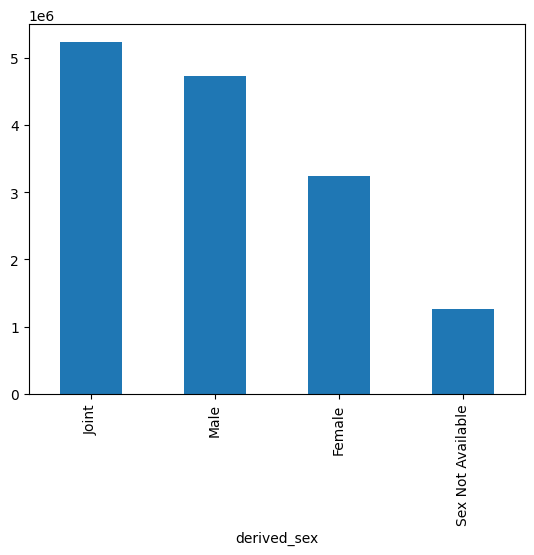

In [7]:
print(df['derived_sex'].value_counts(normalize=True))
df['derived_sex'].value_counts().plot(kind='bar')

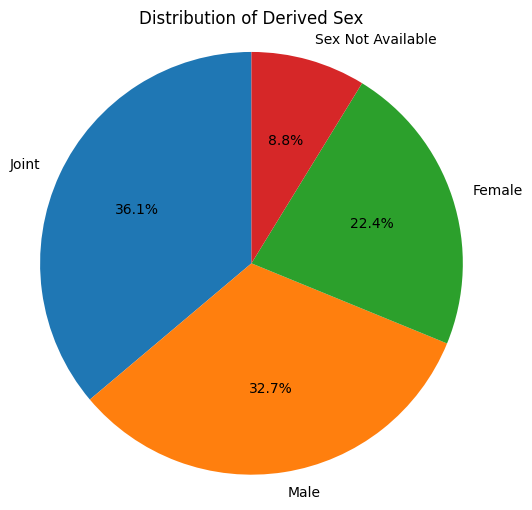

In [8]:
counts = df['derived_sex'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Distribution of Derived Sex')
plt.axis('equal')
plt.show()

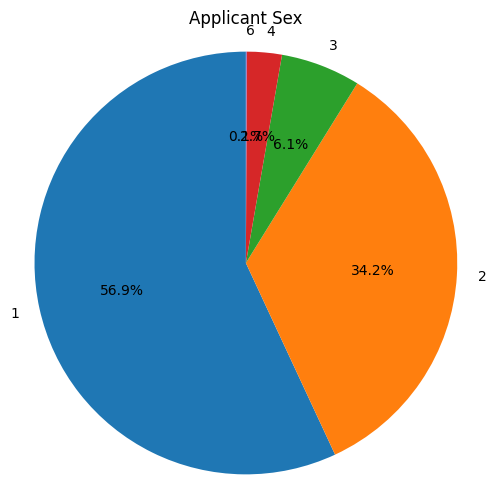

In [9]:
counts = df['applicant_sex'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Applicant Sex')
plt.axis('equal')
plt.show()

In [10]:
df['applicant_sex'].value_counts()

applicant_sex
1    8244932
2    4957177
3     883121
4     386470
6       9939
Name: count, dtype: int64

Values:
- 1 - Male
- 2 - Female
- 3 - Information not provided by applicant in mail, internet, or telephone application
- 4 - Not applicable
- 6 - Applicant selected both male and female

In [11]:
df['interest_rate'].describe()

count     12291741
unique       18314
top         Exempt
freq        376034
Name: interest_rate, dtype: object

In [12]:
df['interest_rate'].dtype


dtype('O')

In [13]:
df['interest_rate'].isna().sum()

np.int64(2189898)

In [14]:
df['interest_rate'][df['interest_rate'].isna()]

17131       NaN
18912       NaN
19130       NaN
19178       NaN
19603       NaN
           ... 
14481634    NaN
14481635    NaN
14481636    NaN
14481637    NaN
14481638    NaN
Name: interest_rate, Length: 2189898, dtype: object

In [15]:
df = df.dropna(subset=['interest_rate'])

In [16]:
df['interest_rate'].isna().sum()

np.int64(0)

In [17]:
df['interest_rate'].dtype

dtype('O')

In [18]:
df['interest_rate'] = pd.to_numeric(df['interest_rate'], errors='coerce')

In [19]:
df['interest_rate'].dtype

dtype('float64')

In [20]:
df['interest_rate'].isna().sum()

np.int64(376034)

In [21]:
df['interest_rate'][df['interest_rate'].isna()]

6036       NaN
6037       NaN
6038       NaN
6041       NaN
6042       NaN
            ..
14478592   NaN
14478593   NaN
14478594   NaN
14478595   NaN
14478596   NaN
Name: interest_rate, Length: 376034, dtype: float64

In [22]:
df = df.dropna(subset=['interest_rate'])

In [23]:
df['interest_rate'].isna().sum()

np.int64(0)

In [24]:
df['interest_rate'].describe().round(2)

count    11915707.00
mean            6.03
std             1.62
min             0.00
25%             5.25
50%             6.25
75%             6.99
max           587.50
Name: interest_rate, dtype: float64

In [25]:
df = df[df['interest_rate'] <= 30] #outliers

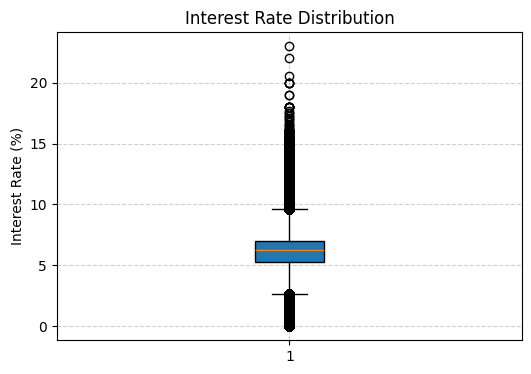

In [26]:
plt.figure(figsize=(6,4))
plt.boxplot(df['interest_rate'].dropna(), vert=True, patch_artist=True)
plt.title('Interest Rate Distribution')
plt.ylabel('Interest Rate (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

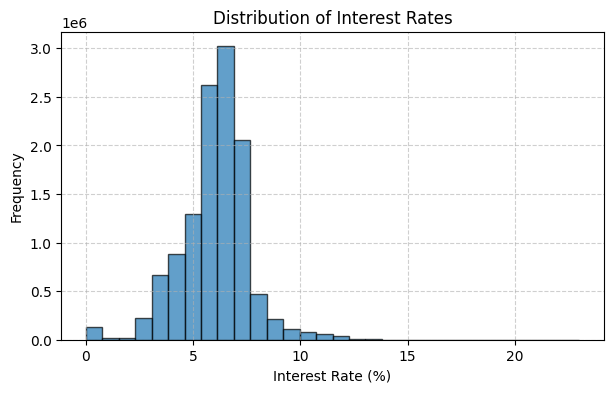

In [27]:

plt.figure(figsize=(7, 4))
plt.hist(df['interest_rate'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [28]:
df.columns

Index(['activity_year', 'lei', 'derived_msa-md', 'state_code', 'county_code',
       'census_tract', 'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'derived_ethnicity', 'derived_race',
       'derived_sex', 'action_taken', 'purchaser_type', 'preapproval',
       'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage',
       'open-end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread',
       'hoepa_status', 'total_loan_costs', 'total_points_and_fees',
       'origination_charges', 'discount_points', 'lender_credits', 'loan_term',
       'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'construction_method',
       'occupancy_type', 'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_

In [29]:
df['applicant_ethnicity-1'].value_counts()

applicant_ethnicity-1
2.0     8408689
3.0     1613766
1.0     1511958
4.0      270060
14.0      50150
11.0      37284
12.0      13767
13.0       5769
Name: count, dtype: int64

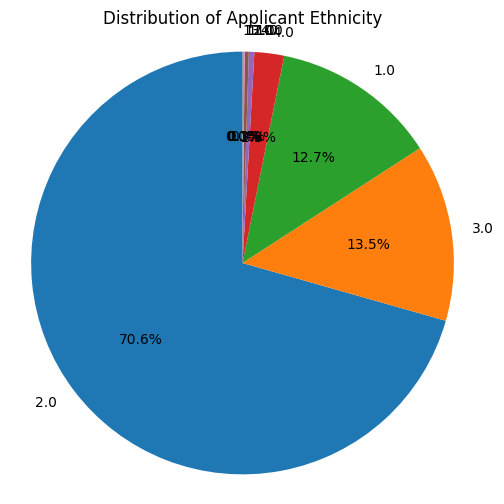

In [30]:
counts = df['applicant_ethnicity-1'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Distribution of Applicant Ethnicity')
plt.axis('equal')
plt.show()

Values:
- 1 - Hispanic or Latino
- 11 - Mexican
- 12 - Puerto Rican
- 13 - Cuban
- 14 - Other Hispanic or Latino
- 2 - Not Hispanic or Latino
- 3 - Information not provided by applicant in mail, internet, or telephone application
- 4 - Not applicable

In [31]:
df['applicant_race-1'].value_counts()

applicant_race-1
5.0     7771281
6.0     1771304
3.0      963744
2.0      865979
7.0      269828
1.0      110205
21.0      76977
4.0       20971
27.0      17695
22.0      16475
23.0      11120
26.0       6401
25.0       5080
44.0       3594
24.0       1872
42.0        565
41.0        455
43.0        411
Name: count, dtype: int64

<Axes: xlabel='applicant_race-1'>

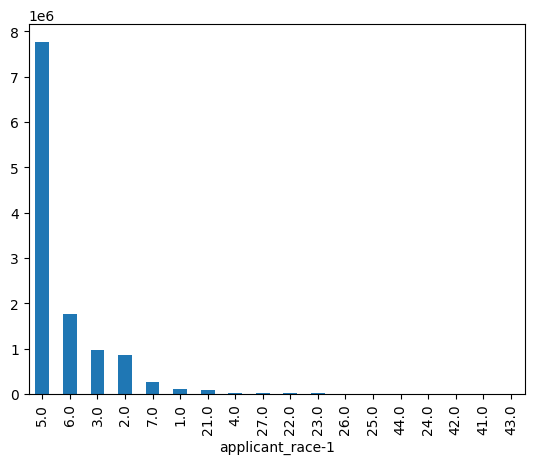

In [32]:
df['applicant_race-1'].value_counts().plot(kind='bar')

Values:
- 1 - American Indian or Alaska Native
- 2 - Asian
- 21 - Asian Indian
- 22 - Chinese
- 23 - Filipino
- 24 - Japanese
- 25 - Korean
- 26 - Vietnamese
- 27 - Other Asian
- 3 - Black or African American
- 4 - Native Hawaiian or Other Pacific Islander
- 41 - Native Hawaiian
- 42 - Guamanian or Chamorro
- 43 - Samoan
- 44 - Other Pacific Islander
- 5 - White
- 6 - Information not provided by applicant in mail, internet, or telephone application
- 7 - Not applicable